In [ ]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
# load specific race
session = fastf1.get_session(2025, 'Qatar', 'R')
session.load()

events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '55', '4', '12', '63', '14', '16', '30', '22', '23', '44', '5', '43', '31', '10', '18', '6', '87

In [60]:
lap_times = session.laps

In [ ]:
df = pd.DataFrame(lap_times)
data_base = df[['Driver','LapTime','LapNumber','Stint','Compound','TrackStatus']]

In [73]:
drivers = pd.DataFrame()

In [62]:
data_base.dtypes

Driver                  object
LapTime        timedelta64[ns]
LapNumber              float64
Stint                  float64
Compound                object
TrackStatus             object
dtype: object

‘1’: Track clear (beginning of session or to indicate the end
of another status)

‘2’: Yellow flag (sectors are unknown)

‘3’: ??? Never seen so far, does not exist?

‘4’: Safety Car

‘5’: Red Flag

‘6’: Virtual Safety Car deployed

‘7’: Virtual Safety Car ending (As indicated on the drivers steering wheel, on tv and so on; status ‘1’ will mark the actual end)



In [63]:
# only select where race is running
data_base[data_base['TrackStatus'] == '1']

,Driver,LapTime,LapNumber,Stint,Compound,TrackStatus
0,VER,0 days 00:01:28.940000,1.0,1.0,MEDIUM,1
1,VER,0 days 00:01:27.349000,2.0,1.0,MEDIUM,1
2,VER,0 days 00:01:27.511000,3.0,1.0,MEDIUM,1
3,VER,0 days 00:01:27.324000,4.0,1.0,MEDIUM,1
4,VER,0 days 00:01:26.843000,5.0,1.0,MEDIUM,1
...,...,...,...,...,...,...
1062,BEA,0 days 00:01:25.451000,37.0,3.0,HARD,1
1063,BEA,0 days 00:01:25.577000,38.0,3.0,HARD,1
1064,BEA,0 days 00:01:25.337000,39.0,3.0,HARD,1
1065,BEA,0 days 00:01:30.153000,40.0,3.0,HARD,1


In [ ]:
# create mean of laptime
mean = data_base.groupby('Driver', as_index=False)['LapTime'].mean()
mean = mean.rename(columns={'LapTime': 'mean'})
drivers = mean

In [ ]:
# std of lap times
std = data_base.groupby('Driver', as_index=False)['LapTime'].std()
std = std.rename(columns={'LapTime': 'std'})

drivers['std'] = drivers['Driver'].map(std.set_index('Driver')['std'])


In [112]:
# 90t percentile
quantile = data_base.groupby('Driver', as_index=False)['LapTime'].quantile(0.9)
quantile = quantile.rename(columns={'LapTime': 'quantile'})

drivers['quantile'] = drivers['Driver'].map(quantile.set_index('Driver')['quantile'])


In [115]:
drivers.sort_values('mean', ascending=True)

,Driver,mean,std,quantile
19,VER,0 days 00:01:29.091947368,0 days 00:00:13.140033780,0 days 00:01:29.111600
14,PIA,0 days 00:01:29.232210526,0 days 00:00:13.755441785,0 days 00:01:33.694199999
9,HUL,0 days 00:01:29.414666666,0 days 00:00:02.490448125,0 days 00:01:31.689500
13,OCO,0 days 00:01:29.486509090,0 days 00:00:08.407256400,0 days 00:01:30.327600
16,SAI,0 days 00:01:29.489578947,0 days 00:00:12.583540255,0 days 00:01:30.801600
12,NOR,0 days 00:01:29.500982456,0 days 00:00:13.314945317,0 days 00:01:34.111999999
2,ANT,0 days 00:01:29.588736842,0 days 00:00:12.812738253,0 days 00:01:30.740000
15,RUS,0 days 00:01:29.944561403,0 days 00:00:12.453058677,0 days 00:01:31.492200
1,ALO,0 days 00:01:30.040105263,0 days 00:00:12.396934769,0 days 00:01:31.204600
11,LEC,0 days 00:01:30.088175438,0 days 00:00:12.022259471,0 days 00:01:32.588000


# Build Consistency Score

In [ ]:
drivers['score'] = drivers['mean'] + drivers['std'] + drivers['quantile']

for _, row in drivers.drop_duplicates('Driver').iterrows():
    print(f"name {row['Driver']} und score {row['score']}")

name ALB und score 0 days 00:03:15.564860466
name ALO und score 0 days 00:03:13.641640032
name ANT und score 0 days 00:03:13.141475095
name BEA und score 0 days 00:03:49.563485242
name BOR und score 0 days 00:03:16.332397276
name COL und score 0 days 00:03:17.403678441
name GAS und score 0 days 00:03:16.726555662
name HAD und score 0 days 00:03:15.108003393
name HAM und score 0 days 00:03:15.600014983
name HUL und score 0 days 00:03:03.594614791
name LAW und score 0 days 00:03:15.117484637
name LEC und score 0 days 00:03:14.698434909
name NOR und score 0 days 00:03:16.927927772
name OCO und score 0 days 00:03:08.221365490
name PIA und score 0 days 00:03:16.681852310
name RUS und score 0 days 00:03:13.889820080
name SAI und score 0 days 00:03:12.874719202
name STR und score 0 days 00:03:27.113581956
name TSU und score 0 days 00:03:15.471243244
name VER und score 0 days 00:03:11.343581148


In [ ]:
drivers['score'] = drivers['mean'] + drivers['std'] + drivers['quantile']
drivers[['Driver', 'score']]

,Driver,score
0,ALB,0 days 00:03:15.564860466
1,ALO,0 days 00:03:13.641640032
2,ANT,0 days 00:03:13.141475095
3,BEA,0 days 00:03:49.563485242
4,BOR,0 days 00:03:16.332397276
5,COL,0 days 00:03:17.403678441
6,GAS,0 days 00:03:16.726555662
7,HAD,0 days 00:03:15.108003393
8,HAM,0 days 00:03:15.600014983
9,HUL,0 days 00:03:03.594614791


In [130]:
drivers.sort_values('score', ascending=True)

,Driver,mean,std,quantile,score
9,HUL,0 days 00:01:29.414666666,0 days 00:00:02.490448125,0 days 00:01:31.689500,0 days 00:03:03.594614791
13,OCO,0 days 00:01:29.486509090,0 days 00:00:08.407256400,0 days 00:01:30.327600,0 days 00:03:08.221365490
19,VER,0 days 00:01:29.091947368,0 days 00:00:13.140033780,0 days 00:01:29.111600,0 days 00:03:11.343581148
16,SAI,0 days 00:01:29.489578947,0 days 00:00:12.583540255,0 days 00:01:30.801600,0 days 00:03:12.874719202
2,ANT,0 days 00:01:29.588736842,0 days 00:00:12.812738253,0 days 00:01:30.740000,0 days 00:03:13.141475095
1,ALO,0 days 00:01:30.040105263,0 days 00:00:12.396934769,0 days 00:01:31.204600,0 days 00:03:13.641640032
15,RUS,0 days 00:01:29.944561403,0 days 00:00:12.453058677,0 days 00:01:31.492200,0 days 00:03:13.889820080
11,LEC,0 days 00:01:30.088175438,0 days 00:00:12.022259471,0 days 00:01:32.588000,0 days 00:03:14.698434909
7,HAD,0 days 00:01:30.248092592,0 days 00:00:12.511910801,0 days 00:01:32.348000,0 days 00:03:15.108003393
10,LAW,0 days 00:01:30.145859649,0 days 00:00:11.927024988,0 days 00:01:33.044600,0 days 00:03:15.117484637


In [136]:
# get lap time per stint for each driver
pace_per_stint = data_base['LapTime'].groupby([data_base['Driver'], data_base['Stint']]).sum()
pace_per_stint

Driver  Stint
ALB     1.0     0 days 00:10:51.330000
        2.0     0 days 00:38:58.286000
        3.0     0 days 00:35:55.556000
ALO     1.0     0 days 00:10:37.714000
        2.0     0 days 00:38:57.328000
                         ...          
TSU     2.0     0 days 00:38:57.997000
        3.0     0 days 00:35:51.886000
VER     1.0     0 days 00:10:27.301000
        2.0     0 days 00:38:39.054000
        3.0     0 days 00:35:31.886000
Name: LapTime, Length: 61, dtype: timedelta64[ns]

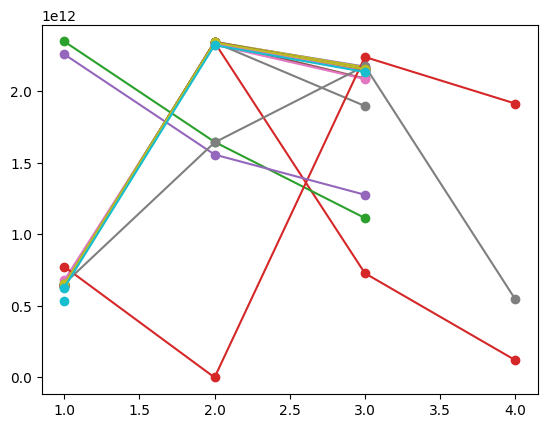

In [ ]:
# fastes per stint

